In [1]:
import numpy as np
import matplotlib.pyplot as plt

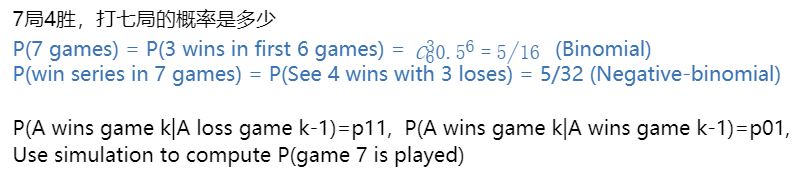

In [2]:
p=0.5
p_01=0.6
p_11=0.4

def who_wins(p):
    u=np.random.rand()
    return u>p
    

def game():
    n=0
    A_win=0
    B_win=0
    A_last_game=None
    
    while True:        
        if A_last_game is None:
            A_last_game = who_wins(p)
        elif A_last_game==1:
            A_last_game = who_wins(p_01)
        else:
            A_last_game = who_wins(p_11)
        
        n=n+1
        A_win+=A_last_game
        B_win+=1-A_last_game
        
        if A_win==4 or B_win==4:
            return n

In [3]:
sum([game()//7 for i in range(1000)])/1000

0.382

In [4]:
int(True)

1

### 模拟 dice

In [5]:
values = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
sample = np.random.choice(values, p=probs)

In [6]:
dice_roll = np.random.randint(1, 7)
dice_roll

1

### 模拟硬币
* https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

In [7]:
def coin_flip(p=0.5):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
       
    #return flip to be added to numpy array    
    return result

coin_flip()

0

In [8]:
n = 1
p = 0.5
np.random.binomial(n,p)

0

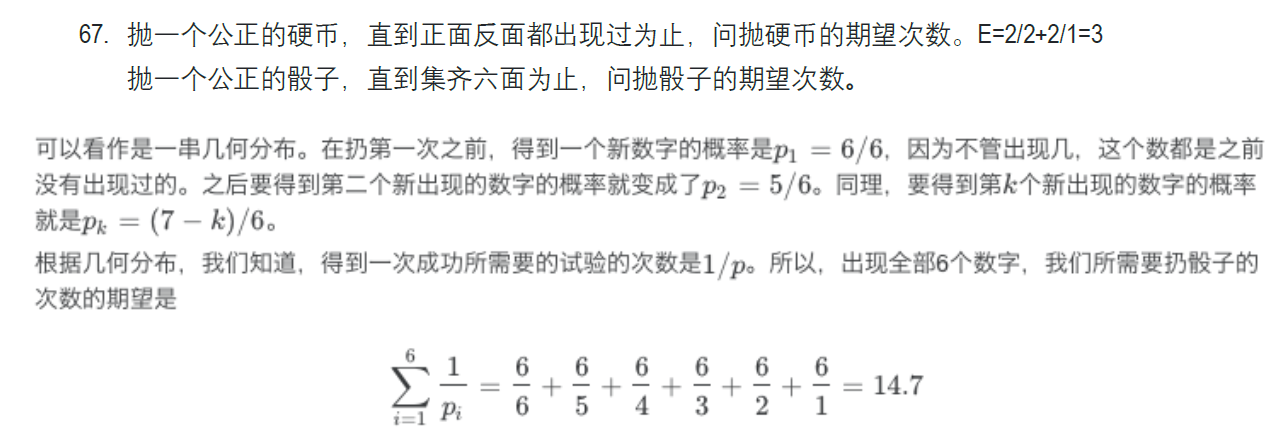

6个fair coin，每天扔一次，直到6个面都H朝上（前一天H朝上的不再扔），求期望多少天能完成游戏；Intuitively是多少天；Python写模拟过程；从这个过程和数据pattern来看，你有什么启发？?

(array([1.863e+03, 4.913e+03, 2.344e+03, 4.360e+02, 3.150e+02, 1.030e+02,
        1.500e+01, 8.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

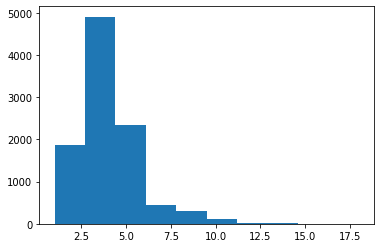

In [9]:
def simulate_days():
    remain = 6 # remain count not H
    days = 0
    while remain > 0:
        days += 1
        N = remain
        for i in range(N):
            result = coin_flip()
            if result == 1: # head
                remain -= 1
            if remain == 0:
                break
        
    return days

days_list = []
for i in range(10000):
    days = simulate_days()
    days_list.append(days)

plt.hist(days_list)

In [10]:
np.mean(days_list)

4.0297

In [11]:
np.median(days_list)

4.0

* https://www.1point3acres.com/bbs/interview/google-data-science-565499.html

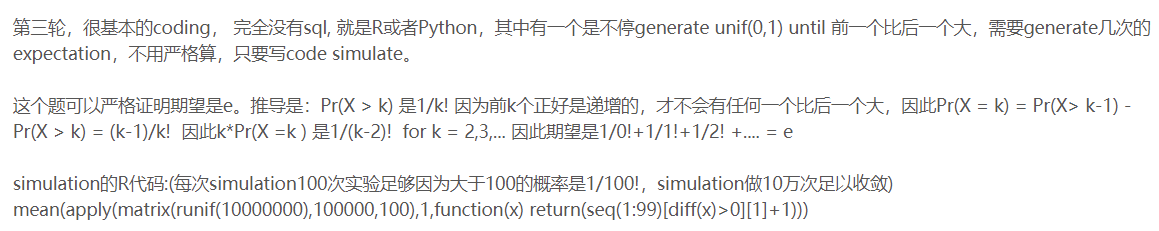

 X_(0) < .... X_(k-1) > X_(k)

In [12]:
import numpy as np

In [13]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
np.random.uniform(0,1,10)

array([0.75244778, 0.49010601, 0.23280425, 0.58426161, 0.78596359,
       0.23419729, 0.92480872, 0.66431617, 0.30543617, 0.3512178 ])

In [14]:
np.random.uniform(0,1)

0.20184568215408438

In [15]:
nums = []

def get_uniform_bigger():
    # get first num
    count = 1
    cur_num = np.random.uniform(0,1)
    
    while True:
        new_num = np.random.uniform(0,1)
        count += 1
        if new_num < cur_num:
            break
        else:
            cur_num = new_num
            
    return count

counts = []
for i in range(10000):
    count = get_uniform_bigger()
    counts.append(count)
    
np.mean(counts)

2.7179

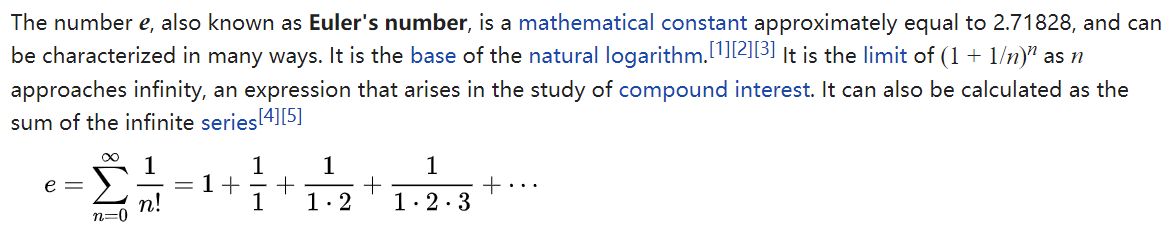

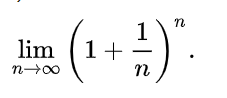 2.71828

### Correlated linear regression

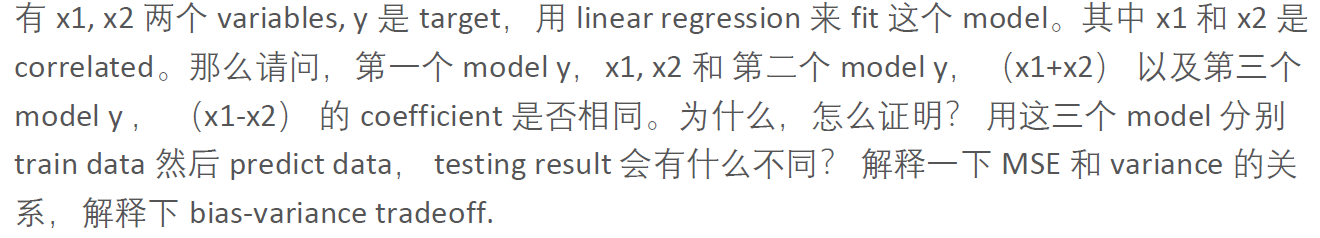

* https://stats.stackexchange.com/questions/83172/generate-two-variables-with-precise-pre-specified-correlation

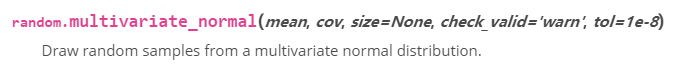

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

* 

In [16]:
nsample = 500
r = 0.9

# Generate pearson correlated data with approximately cor(X, Y) = r
import numpy as np
data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=nsample)
x1, x2 = data[:,0], data[:,1]

data.shape
# That's it! Now let's take a look at the actual correlation:
# import scipy.stats as stats
# print('r=', stats.pearsonr(x1, x2)[0])

(500, 2)

In [17]:
x12_sum = x1 + x2
x12_diff = x1 - x2
e = np.random.normal(size=nsample)

y = 0.7*x1 + 0.3*x2 + 5 + e

In [18]:
import statsmodels.api as sm

X = np.column_stack((x1, x2))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     276.5
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           1.92e-81
Time:                        23:15:45   Log-Likelihood:                -679.45
No. Observations:                 500   AIC:                             1365.
Df Residuals:                     497   BIC:                             1378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9834      0.042    117.939      0.0

In [19]:
import statsmodels.api as sm

X = np.column_stack((x12_sum, x12_diff))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     276.5
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           1.92e-81
Time:                        23:15:45   Log-Likelihood:                -679.45
No. Observations:                 500   AIC:                             1365.
Df Residuals:                     497   BIC:                             1378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9834      0.042    117.939      0.0

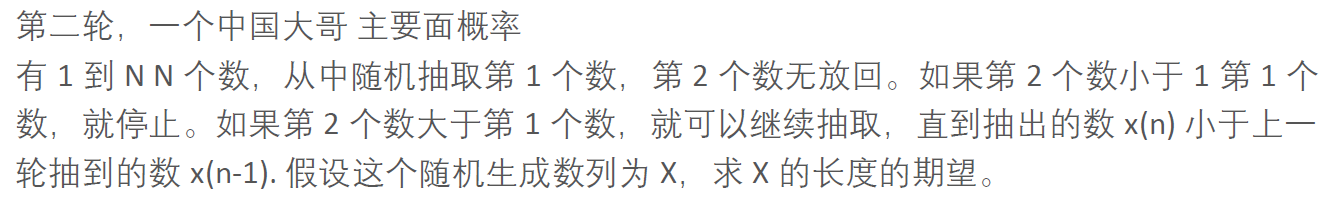

* https://en.wikipedia.org/wiki/E_(mathematical_constant)

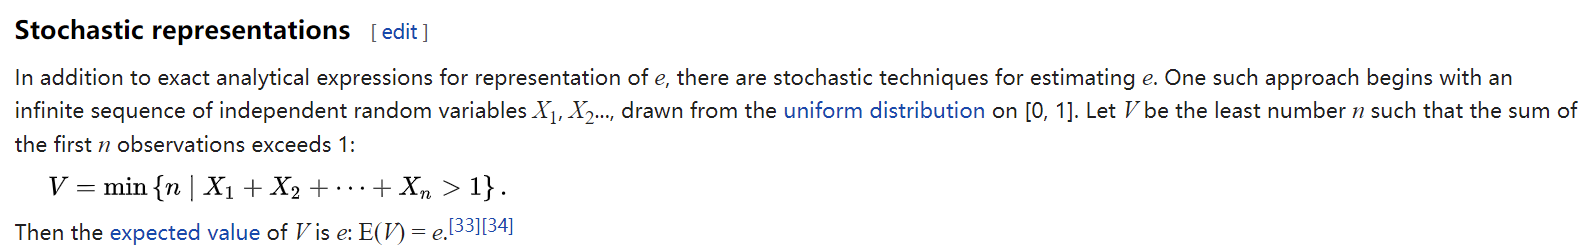

In [46]:
def simulate_x(n):
    arr = [i+1 for i in range(n)] # 1 -> n
    
    num1 = np.random.choice(arr)
    arr.remove(num1)
    
    num2 = np.random.choice(arr)
    arr.remove(num2)
    
    count = 2
    x_arr = [num1, num2]
    
    while num2 > num1: # if num2 < num1, stop
        num1 = num2 # update num1
        num2 = np.random.choice(arr) # get new num2
        arr.remove(num2)
        
        x_arr.append(num2)
        
        count += 1
            
#     print(x_arr)
    return count
    
res = []
for i in range(100000):
    count = simulate_x(100) # N=100
    res.append(count)



In [47]:
np.mean(res)

2.71795